In [ ]:
"""
MatSoc: Intro to ML Techniques
Assignment 2
Deadline: Wednesday, 3 January 2024, 23:59 IST

Name:Pradnya Govil
Roll Number:220778
IITK Email:pradnyag22@iitk.ac.in

You may use the ML library of your choice to do this part.

1. Find the best fit degree of polynomial  for the given data (use the data 1 link)
2. Predict the model for the given data (use data link 2)
3. Solve this competition (use logisitic regression): https://www.kaggle.com/t/6ac9ca8159f64c4eb794206a735a61ca

Use everything you have learned till date in part 3, its a competition!!!

  Note that the code for all parts must be visible

  Make sure all the code is run before you submit the notebook

  share a link to the notebook for problem 3 in this colab notebook if you use
  a different notebook for part 3.

"""

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving data_week2_1.csv to data_week2_1.csv


In [ ]:
import pandas as pd
df=pd.read_csv('data_week2_1.csv')

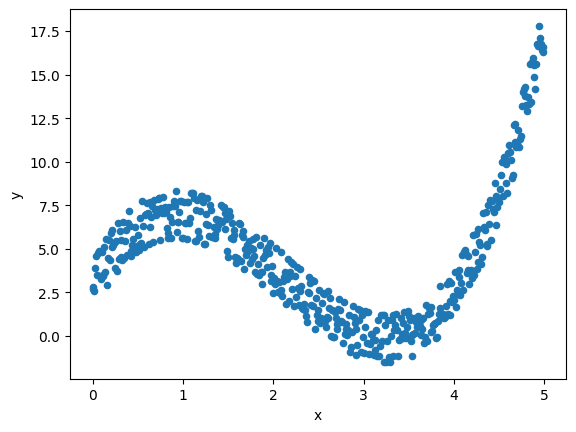

In [ ]:
import matplotlib.pyplot as plt

#1.

df.plot.scatter(x='x',y='y')
plt.show()

In [ ]:

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


# Sorting the DataFrame by 'x' values for plotting
df = df.sort_values(by='x')

x = df['x'].values.reshape(-1,1)
y = df['y'].values

degrees = np.arange(1,4)  # Trying degrees from 1 to 4
mse_values = []

for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree)#For each degree, it will create polynomial features using PolynomialFeatures
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression() #Fitting the linear regression model
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    mse = mean_squared_error(y, y_poly_pred)
    mse_values.append(mse)

best_degree = np.argmin(mse_values) + 1  # +1 because degrees start from 1, not 0
print("Best fit degree of polynomial is ",best_degree)


Best fit degree of polynomial is  3


In [ ]:
#2.
from google.colab import files


uploaded = files.upload()

Saving dataweek2.csv to dataweek2.csv


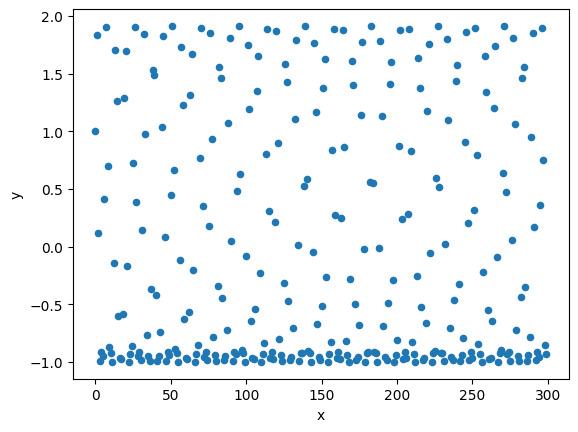

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df2=pd.read_csv('dataweek2.csv')
df2.plot.scatter(x='x',y='y')
plt.show()

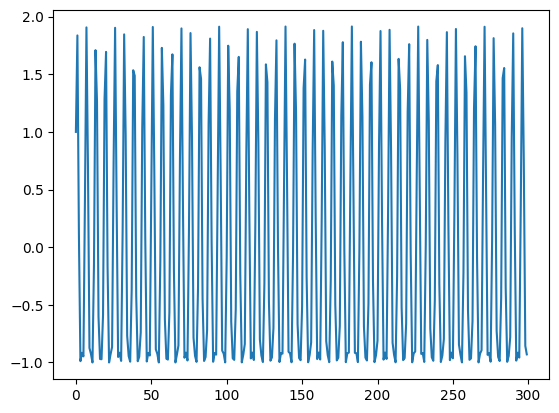

In [ ]:
plt.plot(df2['x'],df2['y'])


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Assuming the function as asinx+bcosx+c(sinx)(cosx)

df2['sin_x'] = np.sin(df2['x'])
df2['cos_x'] = np.cos(df2['x'])
df2['sin_cos_x'] = np.sin(df2['x']) * np.cos(df2['x'])

# new features
X = df2[['sin_x', 'cos_x', 'sin_cos_x', 'x']]

# Target variable
y = df2['y']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

coefficients = model.coef_

# Extracting the predicted parameters
a_pred = coefficients[0]  # coefficient for sin_x
b_pred = coefficients[1]  # coefficient for cos_x
c_pred = coefficients[2]  # coefficient for sin_cos_x


print("Predicted parameters: \na=" , a_pred)
print("b=",b_pred)
print("c=",c_pred)


Predicted parameters: 
a= 1.0000000000000009
b= 1.0000000000000002
c= 1.0000000000000004
